glob: CT_example/1001EE27/*
loading: CT_example/1001EE27\1001EE28
loading: CT_example/1001EE27\1001EE2B
loading: CT_example/1001EE27\1001EE2E
loading: CT_example/1001EE27\1001EE30
loading: CT_example/1001EE27\1001EE33
loading: CT_example/1001EE27\1001EE34
loading: CT_example/1001EE27\1001EE36
loading: CT_example/1001EE27\1001EE38
loading: CT_example/1001EE27\1001EE3A
loading: CT_example/1001EE27\1001EE3C
loading: CT_example/1001EE27\1001EE3F
loading: CT_example/1001EE27\1001EE41
loading: CT_example/1001EE27\1001EE44
loading: CT_example/1001EE27\1001EE46
loading: CT_example/1001EE27\1001EE48
loading: CT_example/1001EE27\1001EE4A
loading: CT_example/1001EE27\1001EE4D
loading: CT_example/1001EE27\1001EE50
loading: CT_example/1001EE27\1001EE52
loading: CT_example/1001EE27\1001EE54
loading: CT_example/1001EE27\1001EE57
loading: CT_example/1001EE27\1001EE59
loading: CT_example/1001EE27\1001EE5B
loading: CT_example/1001EE27\1001EE5E
loading: CT_example/1001EE27\1001EE60
loading: CT_example/10

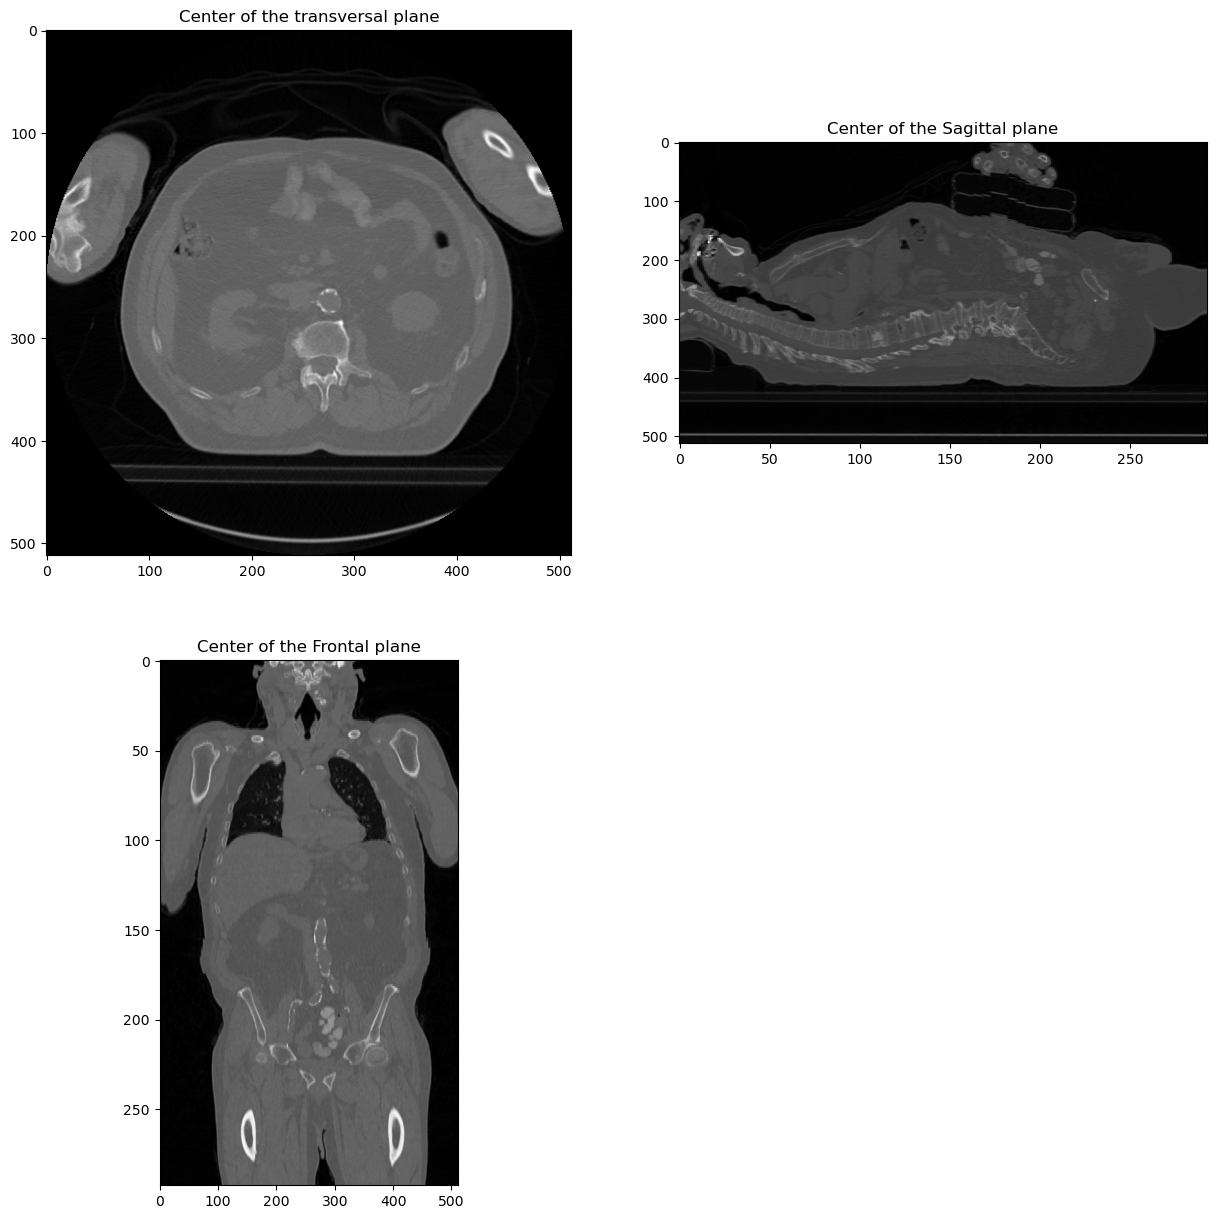

In [12]:
import pydicom
import numpy as np
import matplotlib.pyplot as plt
import sys
import glob

# load the DICOM files
folderpath = "CT_example/1001EE27/*"
files = []
print(f"glob: {folderpath}")
for fname in glob.glob(folderpath, recursive=True):
    print(f"loading: {fname}")
    files.append(pydicom.dcmread(fname))

print(f"file count: {len(files)}")

# skip files with no SliceLocation (eg scout views)
slices = []
skipcount = 0
for f in files:
    if hasattr(f, "SliceLocation"):
        slices.append(f)
    else:
        skipcount = skipcount + 1

print(f"skipped, no SliceLocation: {skipcount}")

# ensure they are in the correct order
slices = sorted(slices, key=lambda s: s.SliceLocation)

# pixel aspects, assuming all slices are the same
ps = slices[0].PixelSpacing
ss = slices[0].SliceThickness
ax_aspect = ps[1] / ps[0]
sag_aspect = ps[1] / ss
cor_aspect = ss / ps[0]

# create 3D array
img_shape = list(slices[0].pixel_array.shape)
img_shape.append(len(slices))
img3d = np.zeros(img_shape)

# fill 3D array with the images from the files
for i, s in enumerate(slices):
    img2d = s.pixel_array
    img3d[:, :, i] = img2d

# plot 3 orthogonal slices
# transversal plane center
plt.figure(figsize=(15, 15))
a1 = plt.subplot(2, 2, 1)
plt.title("Center of the transversal plane")
plt.imshow(img3d[:, :, img_shape[2] // 2], cmap=plt.cm.gray)
a1.set_aspect(ax_aspect)

# sagittal plane center
a2 = plt.subplot(2, 2, 2)
plt.title("Center of the Sagittal plane")
plt.imshow(img3d[:, img_shape[1] // 2, :], cmap=plt.cm.gray)
a2.set_aspect(sag_aspect)

# frontal plane center
a3 = plt.subplot(2, 2, 3)
plt.title("Center of the Frontal plane")
plt.imshow(img3d[img_shape[0] // 2, :, :].T, cmap=plt.cm.gray)
a3.set_aspect(cor_aspect)

plt.show()